In [1]:
import pandas as pd
import numpy as np

In [2]:
# Reading the dataset
df=pd.read_csv('IRIS - IRIS.csv')

In [3]:
df.head() # information of first 5 rows

,sepal-length,sepal-width,petal-length,petal-width,species
0,5.1,3.5,1.4,0.2,2
1,4.9,3.0,1.4,0.2,2
2,4.7,3.2,1.3,0.2,2
3,4.6,3.1,1.5,0.2,2
4,5.0,3.6,1.4,0.2,2


In [4]:
df.info() # Preprocesing the data sets 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal-length  150 non-null    float64
 1   sepal-width   150 non-null    float64
 2   petal-length  150 non-null    float64
 3   petal-width   150 non-null    float64
 4   species       150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


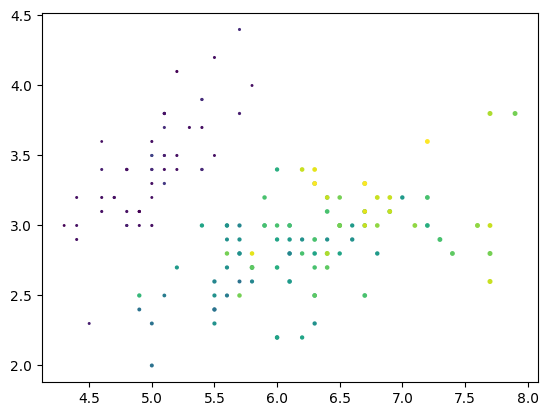

In [5]:
# Plotting between the features
import matplotlib.pyplot as plt
plt.scatter(df['sepal-length'],df['sepal-width'],df['petal-length'],df['petal-width'])

array([[<AxesSubplot: xlabel='sepal-length', ylabel='sepal-length'>,
        <AxesSubplot: xlabel='sepal-width', ylabel='sepal-length'>,
        <AxesSubplot: xlabel='petal-length', ylabel='sepal-length'>,
        <AxesSubplot: xlabel='petal-width', ylabel='sepal-length'>],
       [<AxesSubplot: xlabel='sepal-length', ylabel='sepal-width'>,
        <AxesSubplot: xlabel='sepal-width', ylabel='sepal-width'>,
        <AxesSubplot: xlabel='petal-length', ylabel='sepal-width'>,
        <AxesSubplot: xlabel='petal-width', ylabel='sepal-width'>],
       [<AxesSubplot: xlabel='sepal-length', ylabel='petal-length'>,
        <AxesSubplot: xlabel='sepal-width', ylabel='petal-length'>,
        <AxesSubplot: xlabel='petal-length', ylabel='petal-length'>,
        <AxesSubplot: xlabel='petal-width', ylabel='petal-length'>],
       [<AxesSubplot: xlabel='sepal-length', ylabel='petal-width'>,
        <AxesSubplot: xlabel='sepal-width', ylabel='petal-width'>,
        <AxesSubplot: xlabel='petal-length',

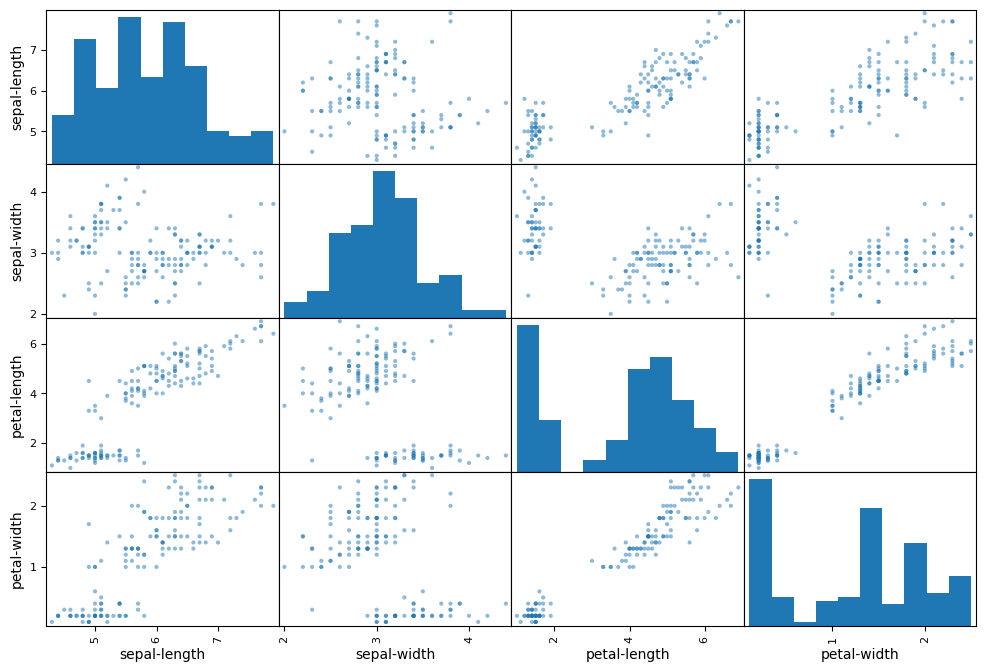

In [6]:
# to see the relations between features
from pandas.plotting import scatter_matrix
attributes=['sepal-length','sepal-width','petal-length','petal-width']
scatter_matrix(df[attributes],figsize=(12,8))

In [7]:
# Extracting Input & Output Columns
X=df.iloc[:,0:4] # all the rows and (0-3) columns
Y=df.iloc[:,-1]  # all the rows and last column

In [8]:
# Train-Test Splitting
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.1)

In [9]:
# Scaling the datasets
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [10]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

In [11]:
# training the model
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

In [12]:
model.fit(X_train,Y_train)

LogisticRegression()

In [14]:
Y_predicted=model.predict(X_test)

In [15]:
# checking the accuracy
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,Y_predicted)

0.8666666666666667

In [16]:
# saving the model
from joblib import dump, load
dump(model, 'IRISFlowerClassifier.joblib')

['IRISFlowerClassifier.joblib']

In [20]:
# test
features=[]
print("Enter the sepal-length,sepal-width,petal-length,petal-width respectively-->")
for i in range(1):
    a=[]
    for j in range(4):
        a.append(float(input()))
    features.append(a)
    
features_tr=scaler.fit_transform(features)
ans=model.predict(features_tr)

if(ans[0]==2):
    print("The Flower is--> Iris-setosa")
elif(ans[0]==1):
    print("The Flower is--> Iris-versicolor")
else:
    print("The Flower is--> Iris-virginica")

Enter the sepal-length,sepal-width,petal-length,petal-width respectively-->
5.1
3.5
1.4
0.2
The Flower is--> Iris-versicolor
